# Exploratory Analysis

### Import Preliminaries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_df = pd.read_csv('Data/test.csv', low_memory=False,
                     parse_dates=['project_submitted_datetime'])
train_df = pd.read_csv('Data/train.csv', low_memory=False, 
                       parse_dates=['project_submitted_datetime'])

dfs = [test_df, train_df]

# Extending times features
for df in dfs:
    df['year'] = df['project_submitted_datetime'].dt.year.astype(int)
    df['month'] = df['project_submitted_datetime'].dt.month.astype(int)
    df['day'] = df['project_submitted_datetime'].dt.day.astype(int)
    df['hour'] = df['project_submitted_datetime'].dt.hour.astype(int)
    

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 20 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null datetime64[ns]
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78035 entries, 0 to 78034
Data columns (total 19 columns):
id                                              78035 non-null object
teacher_id                                      78035 non-null object
teacher_prefix                                  78034 non-null object
school_state                                    78035 non-null object
project_submitted_datetime                      78035 non-null datetime64[ns]
project_grade_category                          78035 non-null object
project_subject_categories                      78035 non-null object
project_subject_subcategories                   78035 non-null object
project_title                                   78035 non-null object
project_essay_1                                 78035 non-null object
project_essay_2                                 78035 non-null object
project_essay_3                                 2704 non-null object
project_essay_4                             

### View Sample Submissionm

In [5]:
sample = pd.read_csv('Data/sample_submission.csv')
sample.head(5)

,id,project_is_approved
0,p233245,0.847682
1,p096795,0.847682
2,p236235,0.847682
3,p233680,0.847682
4,p171879,0.847682


### View Testing Data

In [ ]:
train_df.tial

In [32]:
test_df.tail(10)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,year,month,day,hour
78025,p180965,6d913a1c041a8a08d4336962ff52ed7b,Mrs.,OH,2017-04-18 22:23:45,Grades 3-5,Literacy & Language,"ESL, Literacy",How About Them Apples!,Scranton School is a Title I school with 475 P...,I have been fortunate to have two Donor's Choo...,NaN,NaN,My students need a television to be used to sh...,3,2017,4,18,22
78026,p086706,50a05ac7befa62a82068f4635047102a,Mrs.,OR,2017-04-20 15:09:26,Grades 9-12,Math & Science,Mathematics,Chrome Books for HS Math Ed!,Students in my class struggle to learn algebra...,With chrome books in the classroom my students...,NaN,NaN,My students need equity in access to technolog...,0,2017,4,20,15
78027,p007537,40b17ffde813bc8bcc4fd67c39bfbd6e,Ms.,NJ,2017-04-26 15:11:32,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Becoming Chrome Experts!,My students come from different countries in S...,Chromebooks will give my students an opportuni...,NaN,NaN,My students need 2 Chromebooks for more studen...,6,2017,4,26,15
78028,p135892,bd6bcbd11ee552778e59849100db3b0b,Mrs.,IL,2017-04-11 16:46:28,Grades 3-5,"Literacy & Language, Music & The Arts","Literature & Writing, Visual Arts",Beautiful Bulletin Boards & a Happy Birthday T...,As a teacher in a low-income/high poverty scho...,My students are always working hard creating p...,NaN,NaN,"My students need borders and fadeless paper, C...",31,2017,4,11,16
78029,p089840,181dd0723fcd14f6c00dab65b979f965,Mrs.,NC,2017-04-04 21:00:55,Grades PreK-2,Special Needs,Special Needs,We Like to Move It...Move It! Ergonomic Balanc...,I have a very diverse group of students from m...,A common misconception is movement while learn...,NaN,NaN,My students need flexible seating options that...,5,2017,4,4,21
78030,p183993,be39c3d9b26cbb91f20435ba45e8451e,Mrs.,AL,2017-04-07 07:48:40,Grades PreK-2,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",iPad Intelligence,I teach a diverse group of creative kindergart...,My students will use the Apple iPad mini durin...,NaN,NaN,My students need one iPad mini to enhance thei...,14,2017,4,7,7
78031,p116343,90957869296e26198b1f162f169f8a55,Ms.,NM,2017-04-25 17:46:26,Grades PreK-2,"Warmth, Care & Hunger","Warmth, Care & Hunger",Clean Clothes Center- Finishing the Cycle,Many of our families do not have access to was...,This clothes dryer will allow students that ha...,NaN,NaN,My students need a clothes dryer to supplement...,1,2017,4,25,17
78032,p210728,692376a473aaf753890e329081b5787c,Mrs.,CA,2017-04-17 17:53:12,Grades 6-8,Literacy & Language,"Literacy, Literature & Writing",Everyday Authors Among Us,My 6th grade students are a lively bunch of in...,"Every year, my 6th grade students write and pu...",NaN,NaN,My students need a variety of materials to use...,4,2017,4,17,17
78033,p060531,0fcaec76e9ea1730e81f2ca8eae5891b,Mrs.,OR,2017-04-19 12:11:59,Grades 3-5,"Warmth, Care & Hunger","Warmth, Care & Hunger",Coat Lockers for Our Classroom!,In our classroom students celebrate their indi...,"At this time, my students place their personal...",NaN,NaN,"My students need coat lockers, so they have a ...",9,2017,4,19,12
78034,p087783,d3fd1b7b0efff1eddbd3fbfe4c00711e,Mrs.,IN,2017-04-27 19:50:35,Grades 3-5,"Literacy & Language, Math & Science","Literacy, Mathematics",A Coffee Shop Classroom,I am a teacher in a Title 1 K-5 elementary sch...,I am gradually switching my classroom from tra...,NaN,NaN,My students need flexible seating arrangements...,0,2017,4,27,19


### View Training Data

In [7]:
train_df.head(10)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,year,month,day,hour
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,2016,11,18,14
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,2017,4,26,15
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,2017,1,1,22
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,2016,8,12,15
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,2016,8,6,9
5,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Applied Learning, Literacy & Language","Character Education, Literature & Writing",Need to Reach Our Virtual Mentors!!!,My kids tell me each day that they want to mak...,I started a program called Telementoring in ho...,NaN,NaN,My students need tablets in order to communic...,0,1,2016,11,5,10
6,p103285,4e156c5fb3eea2531601c8736f3751a7,Mrs.,MO,2016-08-31 00:30:43,Grades PreK-2,Health & Sports,Health & Wellness,Active Kindergartners,Kindergarten is the new first grade. My studen...,With balance discs and stools as flexible seat...,NaN,NaN,My students need stability stools and inflatab...,1,1,2016,8,31,0
7,p181781,c71f2ef13b4bc91afac61ca8fd4c0f9f,Mrs.,SC,2016-08-03 13:26:01,Grades PreK-2,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",Fabulous Firsties-Wiggling to Learn!,First graders are fantastic! They are excited ...,First graders love learning! We need 6 wiggle-...,NaN,NaN,My students need wiggle stools to allow them t...,0,1,2016,8,3,13
8,p114989,b580c11b1497a0a67317763b7f03eb27,Ms.,IN,2016-09-13 22:35:57,Grades 6-8,Math & Science,Mathematics,Wobble Chairs Help Fidgety Kids Focus,My seventh graders dream big. They can't wait ...,I have used alternative seating in my classroo...,NaN,NaN,My students need seating that allows the most ...,13,1,2016,9,13,22
9,p191410,2071fb0af994f8f16e7c6ed0f35062a1,Mrs.,IL,2016-09-24 18:38:59,Grades PreK-2,Literacy & Language,Literacy,Snuggle Up With A Good Book,I teach first grade in a small farming town in...,There is nothing better than snuggling up with...,NaN,NaN,My students need 2 youth sized reclining chair...,12,1,2016,9,24,18


### Training Features

In [8]:
train_df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'year', 'month', 'day', 'hour'],
      dtype='object')

### Checking Null Values

In [9]:
train_df.isnull().sum()

id                                                   0
teacher_id                                           0
teacher_prefix                                       4
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 175706
project_essay_4                                 175706
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
year                                                 0
month                                                0
day       

In [10]:
test_df.isnull().sum()

id                                                  0
teacher_id                                          0
teacher_prefix                                      1
school_state                                        0
project_submitted_datetime                          0
project_grade_category                              0
project_subject_categories                          0
project_subject_subcategories                       0
project_title                                       0
project_essay_1                                     0
project_essay_2                                     0
project_essay_3                                 75331
project_essay_4                                 75331
project_resource_summary                            0
teacher_number_of_previously_posted_projects        0
year                                                0
month                                               0
day                                                 0
hour                        

### Data Shape

In [11]:
train_df.shape

(182080, 20)

In [12]:
test_df.shape

(78035, 19)

### Approval Rate

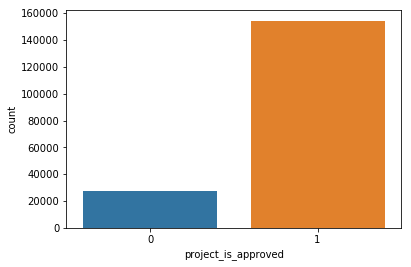

In [13]:
sns.countplot(train_df.project_is_approved)

### Datetime Ranges 

In [14]:
train_df.year.value_counts()

2016    131473
2017     50607
Name: year, dtype: int64

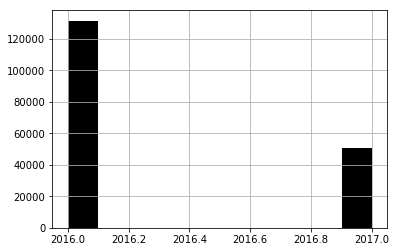

In [15]:
train_df.year.hist(color='black')

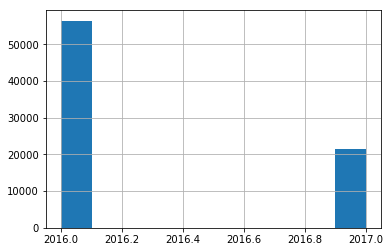

In [16]:
test_df.year.hist()

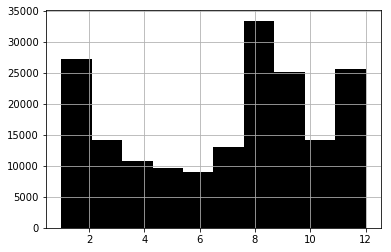

In [17]:
train_df.month.hist(color='black')

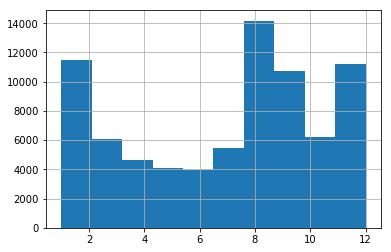

In [18]:
test_df.month.hist()

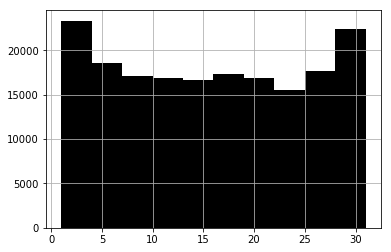

In [19]:
train_df.day.hist(color='black')

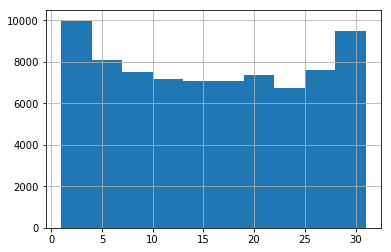

In [20]:
test_df.day.hist()

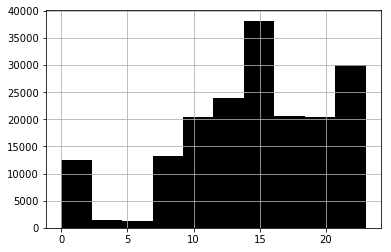

In [21]:
train_df.hour.hist(color='black')

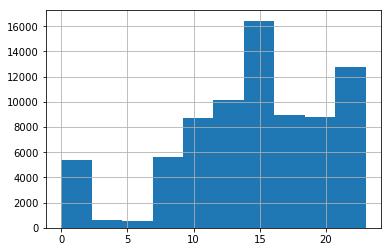

In [22]:
test_df.hour.hist()

### Previously Posted Project

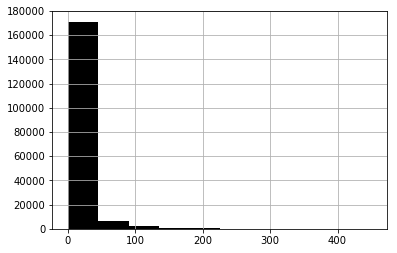

In [23]:
train_df.teacher_number_of_previously_posted_projects.hist(
    color='black')

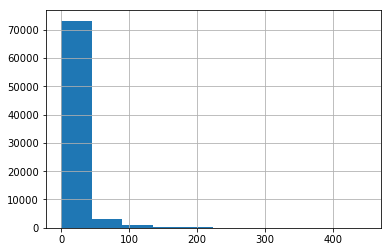

In [24]:
test_df.teacher_number_of_previously_posted_projects.hist()

### Viewing Essay Title Sample

In [25]:
train_df.project_title.sample(1).values

array(['Journey into Second Grade!'], dtype=object)

### Viewing Essay 1 Sample

In [26]:
train_df.project_essay_1.sample(1).values

array([ "Every child learns in a unique way, and I want my classroom to reflect that. Differentiation should not end at the learning materials but should also extend to the learning environment: the furniture. Students sit still for too much of their day. It's my goal to change this.\\r\\nMy students are an energetic bunch of passionate learners. They come into my room every day, eager to transport themselves into the worlds of our stories and to develop their own. Coming from a town of diverse socioeconomic and racial backgrounds, my students thrive in our school where kindness is the key to all decisions."], dtype=object)

### Viewing Essay 2 Sample

In [27]:
train_df.project_essay_2.sample(1).values

array([ 'My students come to school eager to learn everyday. Only one or two have access to the internet at home and they are naturally curious about the world. We live only 20 minutes from the beach, but some have never been. They can not image the world and the experiences they can have. These ipads will open doors that were previously shut. They will also allow my higher learners to add on to their learning, while helping my Spanish and lower level learners fill in the gaps.\\r\\n\\r\\nOur class motto is \\"Today is a Great Day to Learn Something New.\\"\\r\\n\\r\\nThe iPads will be used to everyday and in many different ways. We can use them for math fact fluency, science explorations, and reading skills.'], dtype=object)

### Viewing Essay 3 Sample

In [28]:
train_df.project_essay_3 = train_df.project_essay_3.fillna(value='No Essay')
train_df.project_essay_3.sample(1).values

array(['No Essay'], dtype=object)

### Viewing Essay 4 Sample

In [29]:
train_df.project_essay_4 = train_df.project_essay_4.fillna(value='No Essay')
train_df.project_essay_4.sample(1).values

array(['No Essay'], dtype=object)

### Viewing Resource Sample

In [30]:
train_df.project_resource_summary.sample(1).values

array([ 'My students need Kindle Fire Tablets to use as a technology center where they can reinforce the reading and math skills taught in class.'], dtype=object)

### Project Categories 

In [31]:
train_pc = pd.DataFrame(train_df.project_subject_categories.value_counts())
test_psc = pd.DataFrame(test_df.project_subject_categories.value_counts())
pc = pd.concat([train_psc, test_psc], axis=1)
psc.columns= ['train_df_project_subject_categories',
              'test_df_project_subject_categories']
pc = psc.sort_index()
pc.plot.barh(color=['black','red'])

NameError: name 'train_psc' is not defined

In [ ]:
train

### Project Sub Caterogies

In [ ]:
train_psc = pd.DataFrame(train_df.project_subject_subcategories.value_counts())
test_psc = pd.DataFrame(test_df.project_subject_subcategories.value_counts())
psc = pd.concat([train_psc, test_psc], axis=1)
psc.columns= ['train_df_project_subject_subcategories',
              'test_df_project_subject_subcategories']
psc = psc.sort_index()
psc.plot.barh(color=['black','red'], figsize=(5,60))

### Grade Level

In [ ]:
gc = pd.DataFrame(train_df.project_grade_category.value_counts())
gc.plot.barh(color='black')

In [ ]:
gc = pd.DataFrame(test_df.project_grade_category.value_counts())
gc.plot.barh()

### School State

In [ ]:
train_ss = pd.DataFrame(train_df.school_state.value_counts())
test_ss = pd.DataFrame(test_df.school_state.value_counts())
ss = pd.concat([train_ss, test_ss], axis=1)
ss.columns = ['train_ss','test_ss']
ss.plot.barh(color=['black','red'], figsize=(5,10))

### Teacher Prefix

In [ ]:
tp = pd.DataFrame(train_df.teacher_prefix.value_counts())
tp.plot.barh(color=['black'])

In [ ]:
tp = pd.DataFrame(test_df.teacher_prefix.value_counts())
tp.plot.barh()

### Teachers

In [ ]:
print('train_df teacher records:',len(train_df.teacher_id))
print('test_df teacher records:',len(test_df.teacher_id))
print()
print('train_df unique teacher records:',len(train_df.teacher_id.unique()))
print('test_df unique teacher records:',len(test_df.teacher_id.unique()))

In [ ]:
teachers = pd.DataFrame(train_df.teacher_id.value_counts())
tearhers_g2= teachers[teachers.teacher_id > 1]
print('Teachers that submitted twice:',len(tearhers_g2))

tearhers_g10= teachers[teachers.teacher_id > 10]
print('Teachers that submitted more than 10 times:',len(tearhers_g10))

tearhers_g50= teachers[teachers.teacher_id > 50]
print('Teachers that submitted more than 50 times:',len(tearhers_g50))

In [ ]:
teachers = pd.DataFrame(test_df.teacher_id.value_counts())
tearhers_g2= teachers[teachers.teacher_id > 1]
print('Teachers that submitted twice:',len(tearhers_g2))

tearhers_g10= teachers[teachers.teacher_id > 10]
print('Teachers that submitted more than 10 times:',len(tearhers_g10))

tearhers_g50= teachers[teachers.teacher_id > 50]
print('Teachers that submitted more than 50 times:',len(tearhers_g50))

### Project Essay

It seems applicatiosn used to use 4 essays for their application until 2016-05-17 10:00:51. After this date, applications only used 2 essay questions.

In [ ]:
p34 = train_df[['project_essay_3', 'project_essay_4', 'project_submitted_datetime']]
p34 = p34.sort_values(['project_submitted_datetime'], ascending=False)
p34 = p34.reset_index()
p34.head()

In [ ]:
p34.tail()

In [ ]:
p34[p34.project_essay_3 != 'No Essay'].head(1)

In [ ]:
p34[p34.project_essay_4 != 'No Essay'].head(1)

In [ ]:
p34[p34.project_essay_4 == 'No Essay'].tail(1)

In [ ]:
p34[p34.project_essay_3 != 'No Essay'].tail(1)

In [ ]:
p34[p34.project_essay_3 != 'No Essay'].head(20)

Author: Kavi Sekhon